<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/FrontalDisplacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Saturations 0-1
sw = np.linspace(0.01,1,num=50)

In [4]:
so = 1-sw

In [5]:
krw = sw**3

In [6]:
kro = (1-sw)**3

In [139]:
uo = input("\nenter oil viscocity!: ")
uo = int(uo)
uw = input("\nenter water viscocity!: ")
uw = int(uw)
fw = 1/(1+(uw*kro)/(uo*krw))


enter oil viscocity!: 300

enter water viscocity!: 10


In [140]:
df = pd.DataFrame({'sw':sw,'fw':fw})

In [141]:
# df
qi = 1000 #bbl/d

# t1 = 10 #days

# x = (qi.t/A.phi)(df/dsw)

A = 1000*50

L = 2000 

phi = 0.25


In [142]:
slope = []
for i in range(len(df)):
  if i == 0:
    m = fw[i]/sw[i]
    slope.append(m)
  else:
    m = (fw[i] - fw[i-1])/(sw[i]-sw[i-1])
    slope.append(m)



In [144]:
# len(slope)
# len(df)
df['dfw/dsw'] = pd.Series(slope)

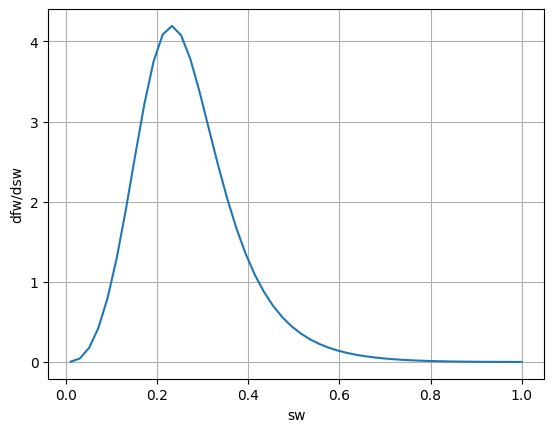

In [145]:
sns.lineplot(x='sw',y='dfw/dsw',data=df)
plt.grid()

In [146]:
slope = np.array(slope)

In [147]:
x_sw_1 = (qi*t1)*5.615*slope/(A*L*phi)

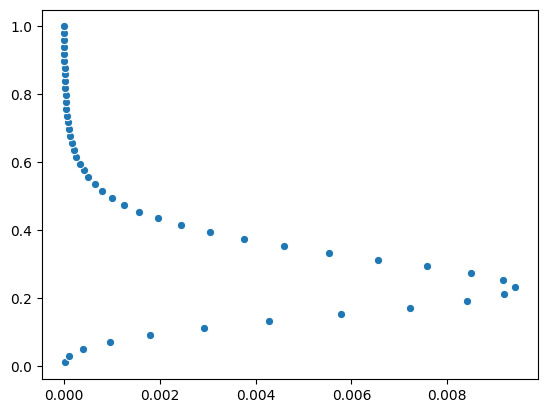

In [148]:
sns.scatterplot(x = x_sw_1,y=sw)

#This means we need to apply welge's correction.

In [149]:
print(max(slope))
print(sw[slope == max(slope)])

4.194335454868697
[0.2322449]


In [150]:
np.where(slope == 4.194335454868697)

(array([11]),)

In [151]:
# slope[slope<=3.511931291432257] = 3.511931291432257
slope[:11] = 4.194335454868697


In [152]:
# slope

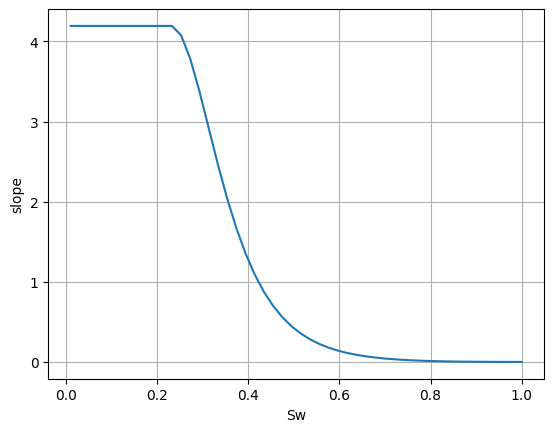

In [153]:
sns.lineplot(sw,slope)
plt.xlabel('Sw')
plt.ylabel('slope')
plt.grid()

In [91]:
qi = 1000 #bbl/d

t1 = 10
x_sw_1 = (qi*t1)*5.615*slope/(A*phi)

t2 = 100 #days
x_sw_2 = (qi*t2)*5.615*slope/(A*phi)


t3 = 365 #days == 1 year 
x_sw_3 = (qi*t3)*5.615*slope/(A*phi)


t4 = 1000 #days == 1 year 
x_sw_4 = (qi*t4)*5.615*slope/(A*phi)

t5 = 6000 #days == 1 year 
# x_sw_5 = (qi*t5)*5.615*slope/(A*L*phi)


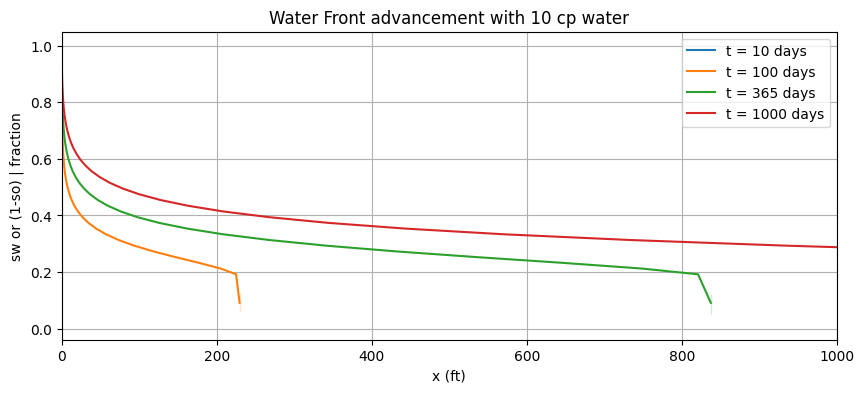

In [156]:
plt.figure(figsize=(10,4))
sns.lineplot(x_sw_1,sw,label='t = 10 days')
sns.lineplot(x_sw_2,sw,label='t = 100 days')
sns.lineplot(x_sw_3,sw,label='t = 365 days')
sns.lineplot(x_sw_4,sw,label='t = 1000 days')
# sns.lineplot(x_sw_5,sw,label='t = 6000 days')

plt.title('Water Front advancement with 10 cp water')
plt.xlabel('x (ft)')
plt.ylabel('sw or (1-so) | fraction')
plt.xlim(0,1000)
plt.grid()

#Case 2

In [159]:
uo = input("\nenter oil viscocity!: ")
uo = int(uo)
uw = input("\nenter water viscocity!: ")
uw = int(uw)
fw = 1/(1+(uw*kro)/(uo*krw))


enter oil viscocity!: 300

enter water viscocity!: 1


In [160]:
# uo = input("\nenter oil viscocity!: ")
# uo = int(uo)
# uw = input("\nenter water viscocity!: ")
# uw = int(uw)
# fw = 1/(1+(uw*kro)/(uo*krw))

A = 1000*50

L = 2000 

phi = 0.25

slope1 = []
for i in range(len(df)):
  if i == 0:
    m = fw[i]/sw[i]
    slope1.append(m)
  else:
    m = (fw[i] - fw[i-1])/(sw[i]-sw[i-1])
    slope1.append(m)

In [161]:
slope1 = np.array(slope1)

In [162]:
max(slope1)

6.904402737027941

In [166]:
# np.where(slope1==max(slope1))
slope1[:6] = 6.904402737027941

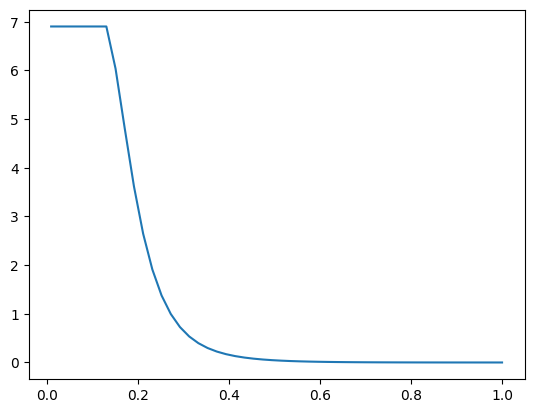

In [167]:
plt.plot(sw,slope1) #applying welge's correction successfully

In [114]:
# np.where(slope1==max(slope1))

In [115]:
# 

In [116]:
#

In [168]:
qi = 1000 #bbl/d

x_sw_1 = (qi*t1)*5.615*slope1/(A*phi)

t2 = 100 #days
x_sw_2 = (qi*t2)*5.615*slope1/(A*phi)


t3 = 365 #days == 1 year 
x_sw_3 = (qi*t3)*5.615*slope1/(A*phi)


t4 = 1000 #days == 1 year 
x_sw_4 = (qi*t4)*5.615*slope1/(A*phi)

t5 = 6000 #days == 1 year 
x_sw_5 = (qi*t5)*5.615*slope1/(A*phi)


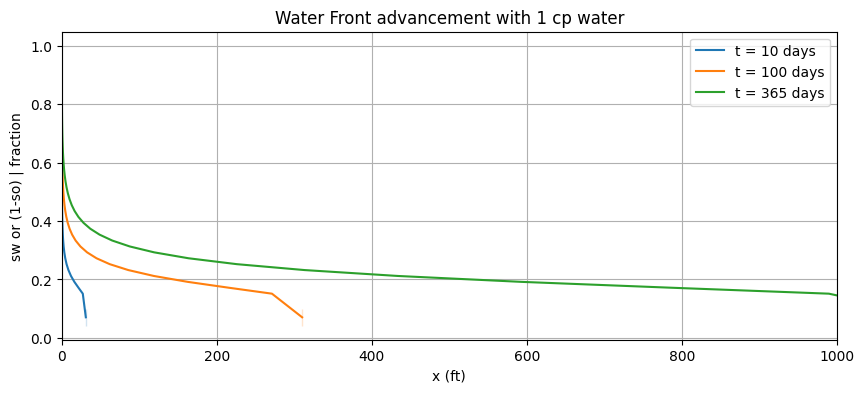

In [170]:
plt.figure(figsize=(10,4))
sns.lineplot(x_sw_1,sw,label='t = 10 days')
sns.lineplot(x_sw_2,sw,label='t = 100 days')
sns.lineplot(x_sw_3,sw,label='t = 365 days')
# sns.lineplot(x_sw_4,sw,label='t = 1000 days')
# sns.lineplot(x_sw_5,sw,label='t = 6000 days')

plt.title('Water Front advancement with 1 cp water')
plt.xlabel('x (ft)')
plt.ylabel('sw or (1-so) | fraction')
plt.xlim(0,1000)
plt.grid()

In [127]:
#You can see that, with 1000 bbl/d injection rate, it if the well spacing is around 1000 ft, it almost
#takes around 1 year to break through. 

Conclusion : Lesser the water viscosity, quicker the breakthrough.

In [171]:
# plt.style.available

In [172]:
#Can ignore
# plt.figure(figsize=(10,4))
# plt.grid()
# plt.style.use('default')
# sns.lineplot(x_sw_1,sw,label='t = 10 days')
# sns.lineplot(x_sw_2,sw,label='t = 100 days')
# sns.lineplot(x_sw_3,sw,label='t = 365 days')
# # sns.lineplot(x_sw_4,sw,label='t = 1000 days')
# # sns.lineplot(x_sw_5,sw,label='t = 6000 days')

# plt.title('Water Front advancement with 1 cp water')
# plt.xlabel('x (ft)')
# # plt.ylabel('sw or (1-so) | fraction')